<a href="https://colab.research.google.com/github/dona-nice/Deep-Learning/blob/master/FFDNN_Implementation(Latest2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import relevant modules

import pandas as pd
import numpy as np

import tensorflow as tf
#import random as python_random
#import random as python_random
from tensorflow import random
np.random.seed(42)
random.set_seed(42)


from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import os


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Load dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KDDTrain+.csv to KDDTrain+.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KDDTest+.csv to KDDTest+.csv


In [ ]:
# Import the loaded csv file into Pandas data frame


# Dataset field names

datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

 # Load NSL_KDD train dataset   

df_NLSKDD = pd.read_csv('KDDTrain+.csv', names=datacols) 

df_NLSKDD = df_NLSKDD.iloc[:,:-1]


# Load NSL_KDD test dataset

df_NLSKDDTest = pd.read_csv('KDDTest+.csv', names=datacols) 

df_NLSKDDTest = df_NLSKDDTest.iloc[:,:-1]




**Train Data**

In [ ]:
#print(f"The Data type = \n\n{df_NLSKDD.dtypes}\n\n")

#print(f"Shape of NLSKDD Dataset: {df_NLSKDD.shape}\n\n")


# train set dimension
print('Train set dimension: {} rows, {} columns'.format(df_NLSKDD.shape[0], df_NLSKDD.shape[1]))

#View Train data

df_NLSKDD.head(5)

Train set dimension: 125973 rows, 42 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


**Test Data**

In [ ]:
#print(f"The Data type = \n\n{df_NLSKDDTest.dtypes}\n\n")

#print(f"Shape of NLSKDDTest Dataset: {df_NLSKDDTest.shape}\n\n")



# train set dimension
print('Test set dimension: {} rows, {} columns'.format(df_NLSKDDTest.shape[0], df_NLSKDDTest.shape[1]))

#View Train data

df_NLSKDDTest.head(5)

Test set dimension: 22544 rows, 42 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [ ]:
#df_NLSKDD = df_NLSKDD.drop('last_flag', axis = 'columns')

#df_NLSKDD.head()

#df_NLSKDD = df_NLSKDD.drop('last_flag', axis = 'columns')

#df_NLSKDDTest = df_NLSKDDTest.drop('last_flag', axis = 'columns')

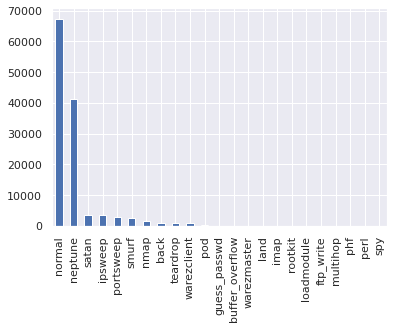

In [ ]:
#Understand the data 
#sns.countplot(x="attack", data=df_NLSKDD) #N - Normal   A - Anomaly

df_NLSKDD['attack'].value_counts().plot(kind='bar')

In [ ]:
# Group the various attacks and Non attack type
df_NLSKDD.groupby(['attack']).count()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
attack,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
back,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956
buffer_overflow,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
ftp_write,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
guess_passwd,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
imap,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
ipsweep,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599
land,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
loadmodule,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
multihop,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [ ]:
# Show all attacks and non attacks
df_NLSKDD['attack'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [ ]:
#df_NLSKDD = df_NLSKDD.drop('last_flag', axis = 'columns')
#df_NLSKDDTest = df_NLSKDDTest.drop('last_flag', axis = 'columns')


In [ ]:
#Convert all non-normal observations into a single class:
def attack_anomalous(text):
    #"""Binarize target labels into normal or anomalous."""
    if text == "normal":
         return 0
    else:
         return 1

df_NLSKDD["attack"] = df_NLSKDD["attack"].apply(attack_anomalous)
df_NLSKDDTest["attack"] = df_NLSKDDTest["attack"].apply(attack_anomalous)



#df_NLSKDD["attack"].head()
df_NLSKDD.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [ ]:
df_NLSKDDTest.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1


In [ ]:
df_NLSKDDTest.head()
df_NLSKDDTest.shape

(22544, 42)

In [ ]:
df_NLSKDD['attack'].value_counts()

0    67343
1    58630
Name: attack, dtype: int64

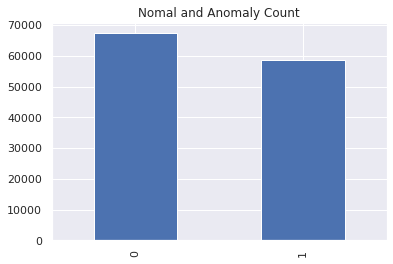

In [ ]:
#To plot single histogram based on single value
#df['attack'].plot(kind='hist', title='Attack Count')
#df_NLSKDD['attack'].plot(kind='hist', title='Attack Count', bins=10, figsize=(8,6)) #Can also add bins and fig size

df_NLSKDD['attack'].value_counts().plot(kind='bar', title='Nomal and Anomaly Count')

In [ ]:
df_NLSKDD.shape

(125973, 42)

Data Pre-processing

Using OneHotEncoder from Scikitlearn to implement onehot coding for categorical features

In [ ]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import Normalizer


for col in df_NLSKDD.columns:
    if df_NLSKDD[col].dtype == "object":
      encoded = LabelEncoder()
      encoded.fit(df_NLSKDD[col])
      df_NLSKDD[col] = encoded.transform(df_NLSKDD[col])


print(df_NLSKDD.shape)
#print(df_test.shape)


(125973, 42)


In [ ]:
df_NLSKDD.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,1,20,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [ ]:
for col in df_NLSKDDTest.columns:
    if df_NLSKDDTest[col].dtype == "object":
      encoded = LabelEncoder()
      encoded.fit(df_NLSKDDTest[col])
      df_NLSKDDTest[col] = encoded.transform(df_NLSKDDTest[col])


print(df_NLSKDDTest.shape)

(22544, 42)


In [ ]:
df_NLSKDDTest.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,1,19,9,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,0,13,9,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1
4,1,1,55,2,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1


In [ ]:
#ohe.categories_

**Process the data by passing data as numpy array and then normalize the data**

In [ ]:
#Convert dataframe into an array
train_labels = df_NLSKDD["attack"].values

train_samples = df_NLSKDD.drop(labels=['attack'], axis=1)


y_test = df_NLSKDDTest["attack"].values

X_test = df_NLSKDDTest.drop(labels=['attack'], axis=1)



print(train_samples.shape)
print(train_labels.shape)
#print(train_labels)

print(X_test.shape)
print(y_test.shape)



(125973, 41)
(125973,)
(22544, 41)
(22544,)


Feature Scaling

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(train_samples)
train_samples = scaler.transform(train_samples)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

#scaled_train_samples = scaler.fit_transform(train_samples)
#scaled_train_samples = scaler.transform

#scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))


print(train_samples)




[[0.         0.5        0.28985507 ... 0.         0.05       0.        ]
 [0.         1.         0.63768116 ... 0.         0.         0.        ]
 [0.         0.5        0.71014493 ... 1.         0.         0.        ]
 ...
 [0.         0.5        0.7826087  ... 0.         0.01       0.        ]
 [0.         0.5        0.43478261 ... 1.         0.         0.        ]
 [0.         0.5        0.28985507 ... 0.         0.         0.        ]]


In [ ]:
print(X_test)

[[0.00000000e+00 5.00000000e-01 7.14285714e-01 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 5.00000000e-01 7.14285714e-01 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [3.46530365e-05 5.00000000e-01 3.01587302e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 5.00000000e-01 3.49206349e-01 ... 0.00000000e+00
  7.00000000e-02 7.00000000e-02]
 [0.00000000e+00 1.00000000e+00 1.74603175e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e-01 8.25396825e-01 ... 0.00000000e+00
  4.40000000e-01 1.00000000e+00]]


In [ ]:
print(train_samples.shape)

print(X_test.shape)

(125973, 41)
(22544, 41)


In [ ]:
# Split data into train and test to verify accuracy after fitting the model

X_train, X_val, y_train, y_val = train_test_split(train_samples, train_labels, test_size = 0.2, random_state = 42)

**tf.keras sequential model**

*Create Artificial Neural Network using a sequential model from keras API integrated into tensorflow *

In [ ]:
#from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation
#from keras.optimizers import SGD
#from sklearn.metrics import mean_squared_error

#Load the TensorBoard notebook extension
%load_ext tensorboard
import datetime
from keras.callbacks import TensorBoard
#from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, TensorBoard




import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.metrics import categorical_crossentropy

#Some extra settings for some fancy visualization.
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (36,)))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________


**Create the model compiler and then train the network**

In [ ]:
#model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

**Create Validation set**

In [ ]:
#history = model.fit(x=train_samples, y=train_labels, validation_split=0.2, batch_size=10, epochs=20, shuffle=True, verbose=2)

history = model.fit(x=train_samples, y=train_labels, verbose=1, epochs=30, shuffle=True, batch_size=64, validation_split=0.2)

#results = model.evaluate(X_val, y_val)

Epoch 1/30
1575/1575 [==============================] - 8s 3ms/step - loss: 0.1084 - accuracy: 0.9616 - val_loss: 0.0594 - val_accuracy: 0.9779
Epoch 2/30
1575/1575 [==============================] - 4s 2ms/step - loss: 0.0498 - accuracy: 0.9818 - val_loss: 0.0424 - val_accuracy: 0.9858
Epoch 3/30
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0375 - accuracy: 0.9867 - val_loss: 0.0336 - val_accuracy: 0.9888
Epoch 4/30
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0304 - accuracy: 0.9894 - val_loss: 0.0296 - val_accuracy: 0.9890
Epoch 5/30
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0257 - accuracy: 0.9914 - val_loss: 0.0244 - val_accuracy: 0.9924
Epoch 6/30
1575/1575 [==============================] - 4s 2ms/step - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.0220 - val_accuracy: 0.9932
Epoch 7/30
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0213 - val_accuracy:

In [ ]:
score = model.evaluate(X_val,y_val)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

NameError: ignored

**Prediction**

In [ ]:
predictions = model.predict(x=X_test, batch_size=10, verbose=0)

In [ ]:
for i in predictions:
  print(i)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=1)

In [ ]:
for i in rounded_predictions:
  print(i)

**Loss Curve**

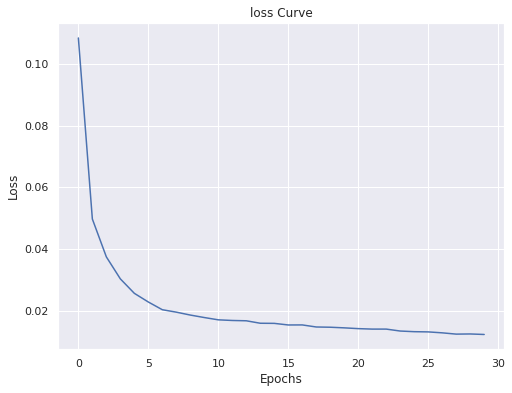

In [ ]:
loss = history.history['loss']

fig = plt.figure(figsize=(8, 6))
plt.title('loss Curve')
plt.xlabel("Epochs")
plt.ylabel("Loss")


plt.plot(loss)
plt.show()

In [ ]:
history_dict = history.history
history_dict.keys()

**Training and Validation Loss**

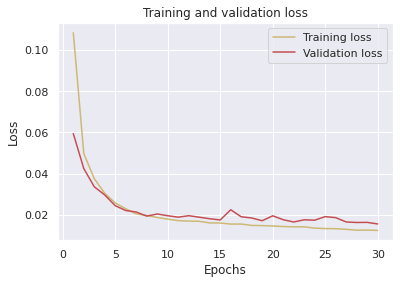

In [ ]:
#Matplotlib to plot the training and validation loss:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Training and Validation Accuracy**

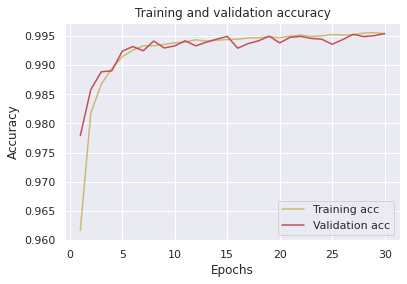

Best Accuracy on training set =  99.55446720123291
Best Accuracy on val set =  99.53958988189697


In [ ]:
#Matplotlib to plot the training and validation accuracy:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# print the best accuracy reached on training set and the test set
print("Best Accuracy on training set = ", max(history.history['accuracy'])*100)
print("Best Accuracy on val set = ", max(history.history['val_accuracy'])*100)

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.000486)
y_pred

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

TP - True Negative 8054
FP - False Positive 1656
FN - False Negative 2185
TP - True Positive 10648
Accuracy Rate: 0.8296145144834317
Misclassification Rate: 0.17038548551656835
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      9710
           1       0.87      0.83      0.85     12833

    accuracy                           0.83     22543
   macro avg       0.83      0.83      0.83     22543
weighted avg       0.83      0.83      0.83     22543



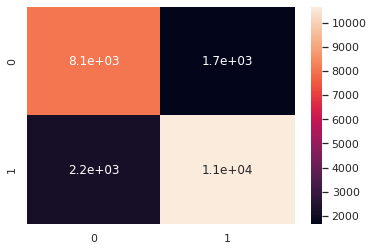

In [ ]:
# making the Confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True)

print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

print(classification_report(y_test, y_pred))

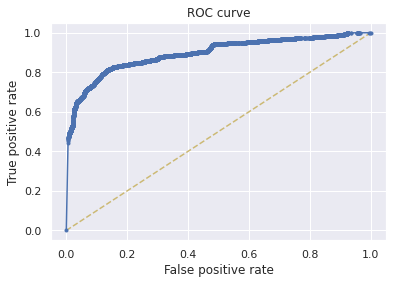

In [ ]:
#ROC can help identify the right threshold.
##################################################################
"""
Receiver Operating Characteristic (ROC) Curve is a plot that helps us 
visualize the performance of a binary classifier when the threshold is varied. 
"""
#ROC

y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  1932    0.000486
Name: thresholds, dtype: float32


In [ ]:
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.8947206902454352


In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
import itertools
import math

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="confusion matrix",
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting "normalize=True".
  """
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
      print("Normalized confusion matrix")
    
  else:
      print("confusion matrix, without normalization")

  print(cm)

  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i,j],
               horizontalalignment="center",
               color="white" if cm[i,j]>thresh else "black")
      
      plt.tight_layout()
      plt.ylabel("True label")
      plt.xlabel("Predicted label")


confusion matrix, without normalization
[[ 8054  1656]
 [ 2185 10648]]


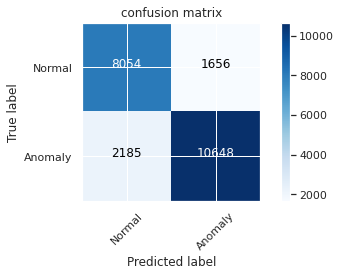

In [ ]:
cm_plot_labels = ["Normal", "Anomaly"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="confusion matrix")
